In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay, roc_curve, f1_score, recall_score
from scipy.stats.mstats import winsorize
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Datasets/Airlines.csv")

In [3]:
df.head(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


In [4]:
df.tail(10)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539373,539374,B6,480,LAX,BOS,5,1435,320,1
539374,539375,DL,2354,LAX,ATL,5,1435,255,0
539375,539376,FL,58,LAX,ATL,5,1435,250,0
539376,539377,B6,717,JFK,SJU,5,1439,220,1
539377,539378,B6,739,JFK,PSE,5,1439,223,1
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


In [5]:
# General info including the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
# Number of Null values
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
# General statiscal info
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [8]:
# Number of duplicated row
df.duplicated().sum()

np.int64(0)

In [9]:
# Total rows and columns
df.shape

(539383, 9)

In [10]:
# Total percent of Non-delay versus delay 
perc_delay =  df["Delay"].value_counts()

perc_delay / 539383 * 100



Delay
0    55.455771
1    44.544229
Name: count, dtype: float64

#### Exploratory Data Analysis

In [11]:
# Replacing the name of the day of the week with the actual name for EDA
Day_of_week = {1:"Monday",
               2:"Tuesday",
               3:"Wednesday",
               4:"Thursday",
               5:"Friday",
               6:"Saturday",
               7:"Sunday" 
               }
df["Day_Of_Week"]= df["DayOfWeek"].map(Day_of_week)

In [12]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday


In [13]:

def period(time):
    if time < 360:
        return 'Midnight'
    elif  360<= time < 720:
        return 'Morning'
    elif 720<= time < 1080:
        return 'Afternoon'
    else:
        return 'Night'
df['TimePeriod'] = df['Time'].apply(period)

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday,Midnight
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday,Midnight
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday,Midnight
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday,Midnight
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday,Midnight


In [14]:
df.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod
539378,539379,CO,178,OGG,SNA,5,1439,326,0,Friday,Night
539379,539380,FL,398,SEA,ATL,5,1439,305,0,Friday,Night
539380,539381,FL,609,SFO,MKE,5,1439,255,0,Friday,Night
539381,539382,UA,78,HNL,SFO,5,1439,313,1,Friday,Night
539382,539383,US,1442,LAX,PHL,5,1439,301,1,Friday,Night


In [15]:
df["Airline"].value_counts()

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64

### Univarate Analysis

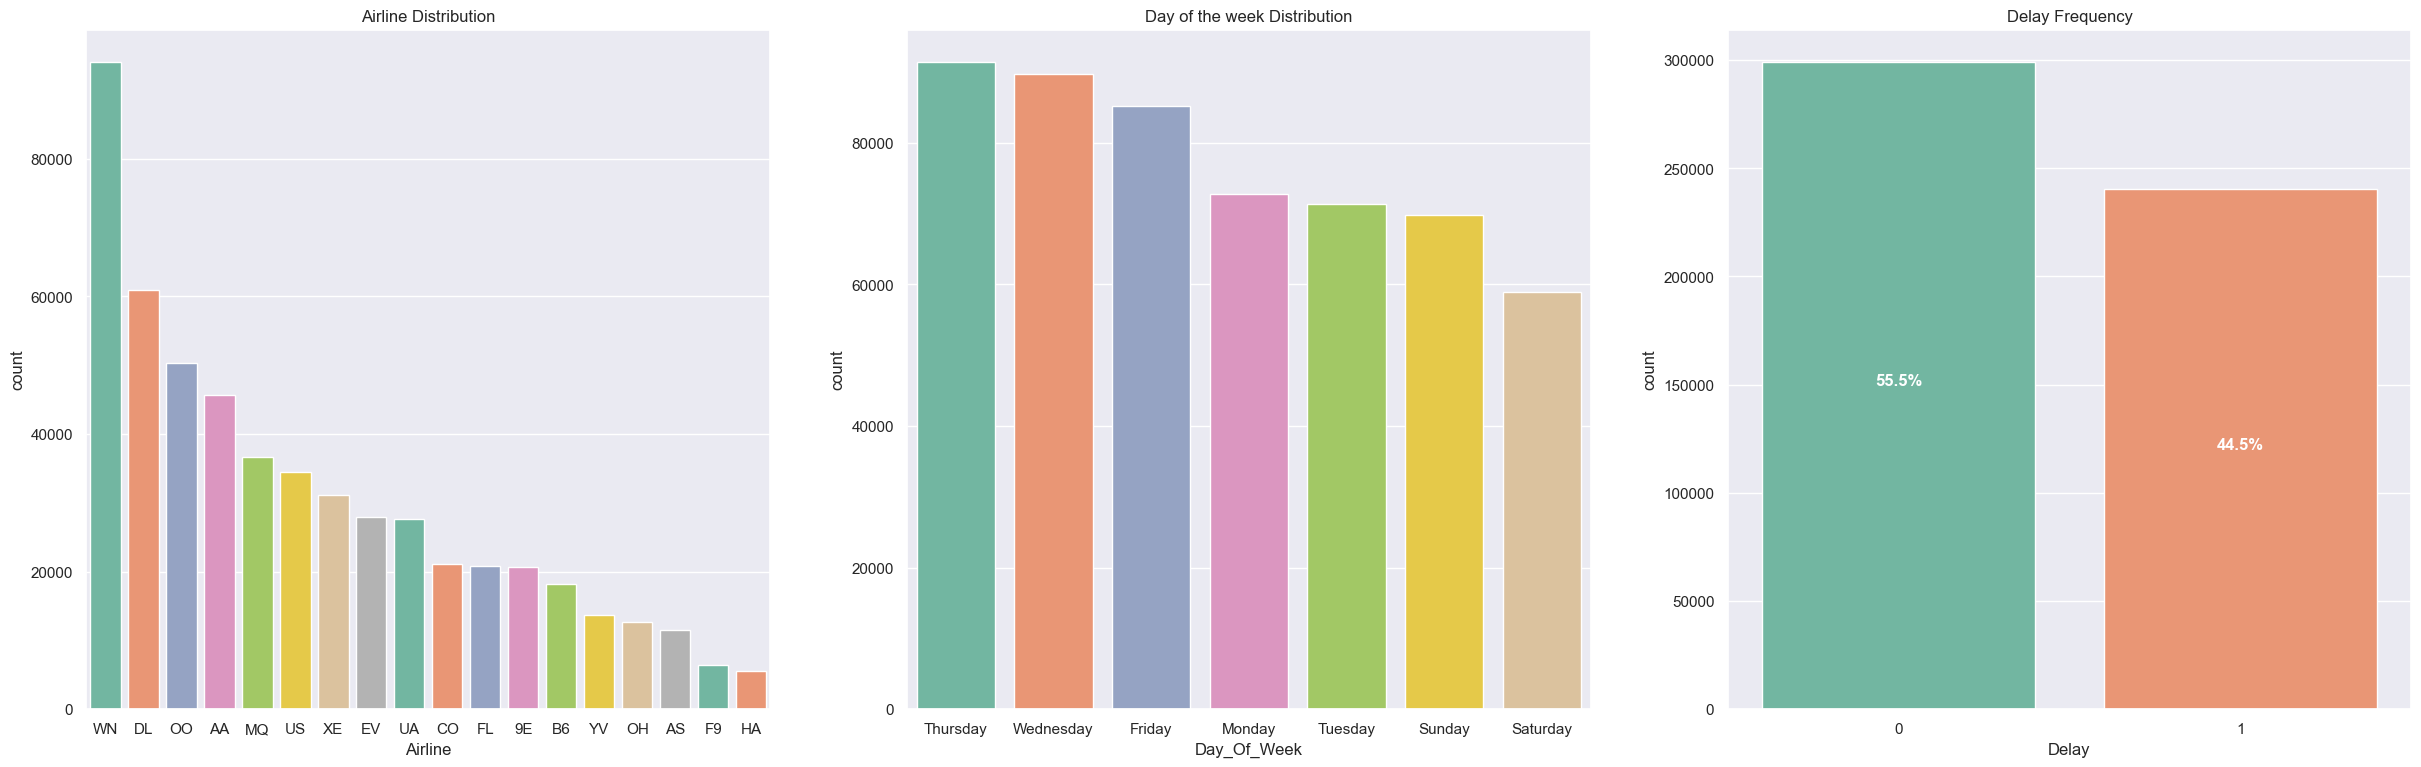

In [16]:
plt.figure(figsize=(30, 30))
plt.subplot(3,3,1)
sns.countplot(data=df, x= "Airline", palette="Set2", order=df["Airline"].value_counts().index)
plt.title("Airline Distribution")

plt.subplot(3,3,2)
sns.countplot(data=df, x= "Day_Of_Week", palette="Set2", order=df["Day_Of_Week"].value_counts().index)
plt.title("Day of the week Distribution")

plt.subplot(3,3,3)
ax = sns.countplot(data=df, x="Delay", palette="Set2")
plt.title("Delay Frequency")

for i, percentage in enumerate(df['Delay'].value_counts(normalize=True) * 100):
    ax.text(i, df['Delay'].value_counts()[i]/2, f'{percentage:.1f}%', 
            ha='center', color='white', fontweight='bold')
    
plt.show()

### Insights: 

Airline Distribution
- It can be noticed that the airline with the highest count here is WN. It can be depict as an economy airline or an international flight. 
- It is seconded by DL and followed by OO
- It shows that in the given datasets, the most frequently used Airlines are WN and DL.
- HA is either a special, occassional or underperforming airline. 

Day of the Week Distribution 
- This highlights Thursdays as the day in which most flights take-off.
- Although, there are slight differences between number of flights on Wednesday, Thursday and Friday. It can be mentioned that from the given data sets, most flights are in Midweek.
- It is also seen in the countplot that Weekend flights are relatively low compared to the beginning of the week. 

Delay
- It indicates that 55.5% of the total datasets have no delays, while 44.5% have delays.
- It depicts that the datasets is slighlty imbalanced, and caution have to be apply when dealing with the models.  

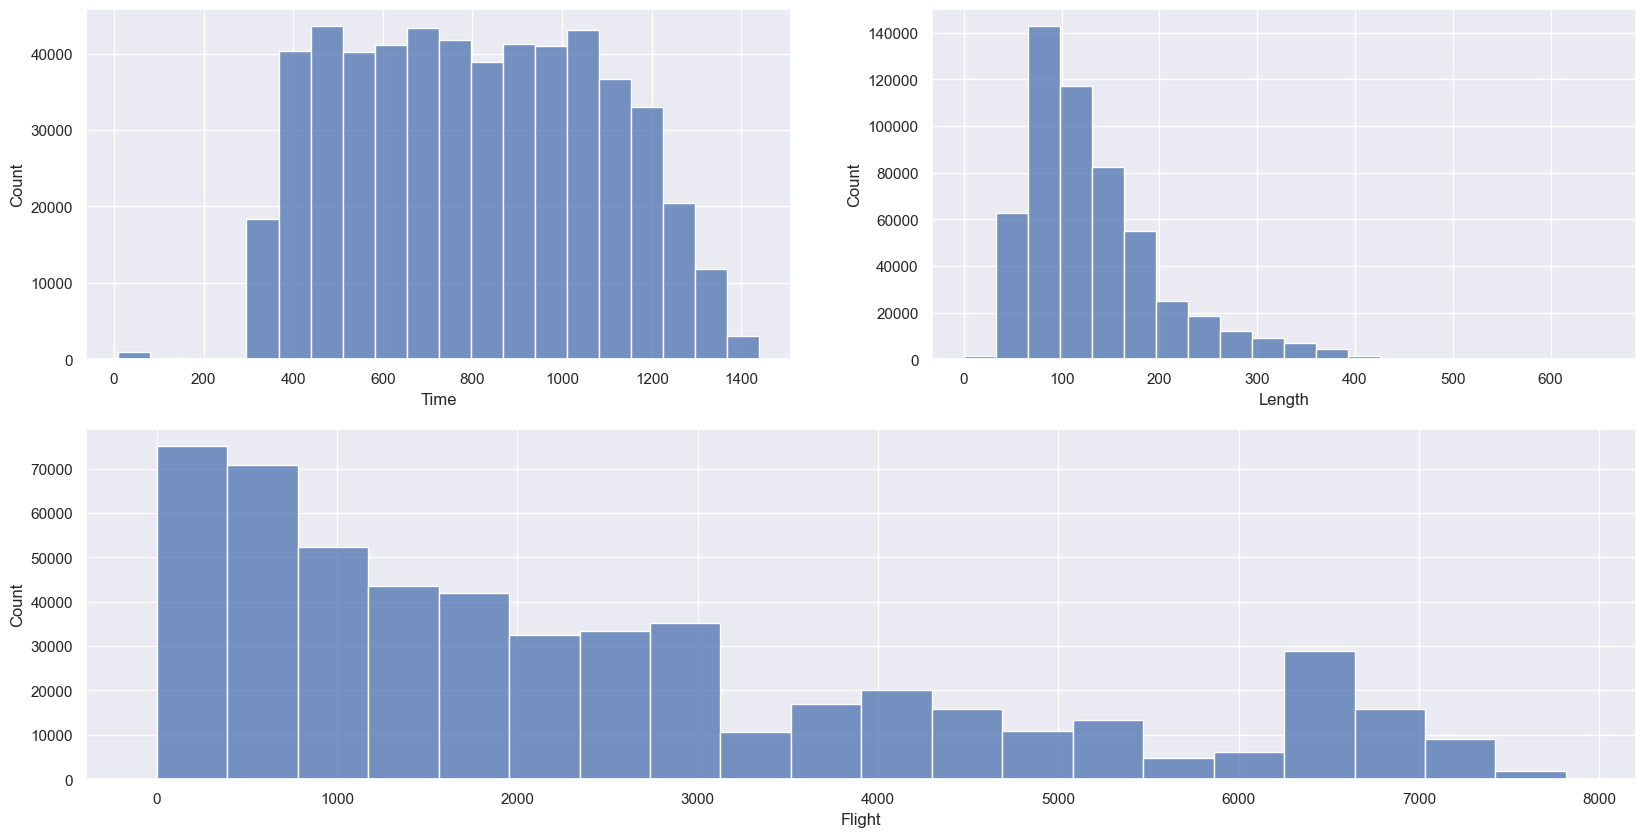

In [17]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.histplot(df["Time"], bins=20)

plt.subplot(2,2,2)
sns.histplot(df["Length"], bins=20)

plt.subplot(2,1,2)
sns.histplot(df["Flight"], bins=20)


plt.show()

### Histogram Insights: 

Time 
- It appears uniformly distributed between 200 and 1400 mins. 
- There are no obvious outliers 

Length (Duration)
- It is positively skewed (skewed to the right)
- It means there are fewer flights with much longer durations, most flights have shorter length (60min - 180min). 
- It means the fewer flights with longer duration are international flight citing them as outliers. 

Flight
- This indicates the flight numbers. 


In [18]:
df['Length'].mean()  

np.float64(132.20200673732765)

In [19]:
df['Length'].median()

np.float64(115.0)

#### Bivariate Analysis

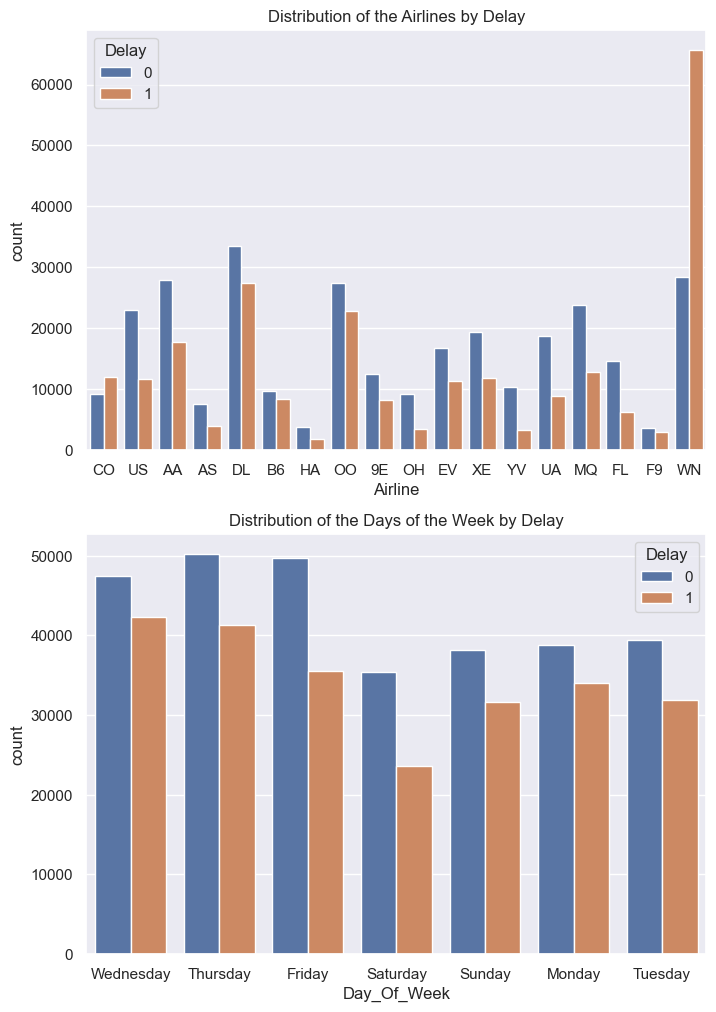

In [20]:
plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
sns.countplot(data=df, x='Airline', hue='Delay')
plt.title("Distribution of the Airlines by Delay")

plt.subplot(2,1,2)
sns.countplot(data=df, x='Day_Of_Week', hue='Delay')
plt.title("Distribution of the Days of the Week by Delay")

plt.show()

### Insights:

Distribution of Airlines by Delay 
- WN has the highest count of delay. This indicates that a flight from WN has the highest probability of being delayed.
- It shows that DL Airline has the highest total of no delays. But, it still might have delays. 

Distribution of the Days of the Week by Delay
- There are not mouch differences between the delays in each day of the week. 
- But, it can be noticed that the Midweek in which there is a higher number of flights has the highest number of delays. 
- Saturday has the lowest count of delays which is possibly due to the lesser flights taken on that day.  


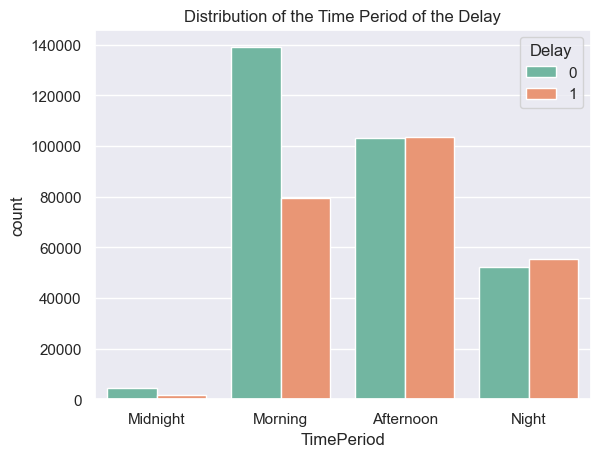

In [21]:
sns.countplot(data=df, x= "TimePeriod", hue="Delay", palette="Set2")
plt.title("Distribution of the Time Period of the Delay")

plt.show()

#### Insights

Distribution of the Time Period of the Delay
- It interprete that highest delays is in the afternoon followed by morning. 
- This indicates that most of the delay happens during the day time (360min - 1080min i.e 6am - 6pm). It might due to more takeoffs, passengers movements, and weather related delays (thunderstorms typically ocuurs in the afternoon)
- Few delays happens in the night, with no delays in the Midnight (12am - 5:59am). This might be as a reason of fewer flights scheduled in the nights, less congestion but however, delay might still occur because of late arrivals from earlier delayed flights esp international flight.

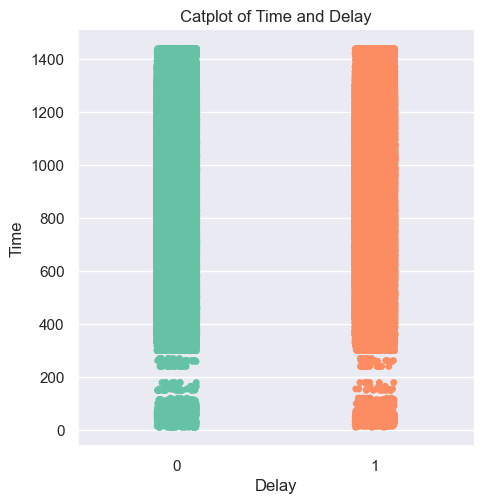

In [22]:
sns.catplot(data=df, x='Delay', y='Time', palette='Set2')
plt.title("Catplot of Time and Delay")

plt.show()

#### Insight

Catplot of Time and Delay
- This is the comaparation of the Time and Delay, it shows that the time period in which delay and non-delays are similar.
- This suggest that the time period the delays happens might not have significance. This datasets seems to be off. 


In [23]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod
0,1,CO,269,SFO,IAH,3,15,205,1,Wednesday,Midnight
1,2,US,1558,PHX,CLT,3,15,222,1,Wednesday,Midnight
2,3,AA,2400,LAX,DFW,3,20,165,1,Wednesday,Midnight
3,4,AA,2466,SFO,DFW,3,20,195,1,Wednesday,Midnight
4,5,AS,108,ANC,SEA,3,30,202,0,Wednesday,Midnight


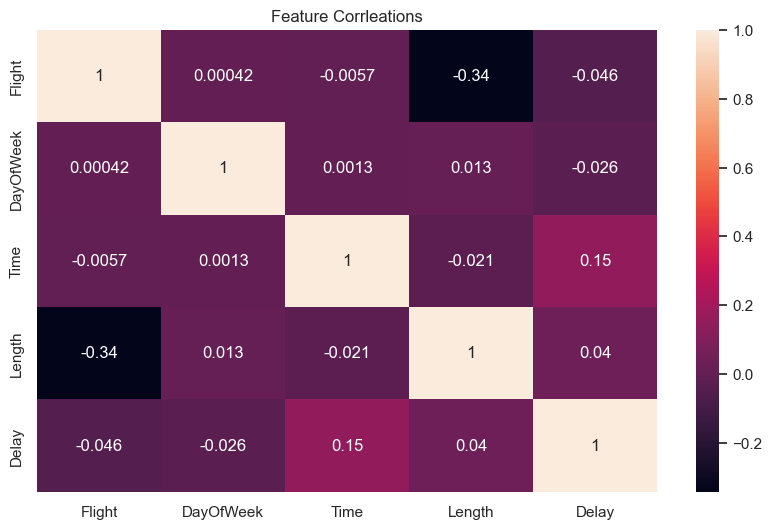

In [24]:
num_col = df.select_dtypes(include=['int'])
num_cols = num_col.drop(columns=['id'])

plt.figure(figsize=(10, 6))
sns.heatmap(num_cols.corr(), annot=True)
plt.title("Feature Corrleations")

plt.show()

In [25]:
num_colm = ['Flight', 'DayOfWeek', 'Time', 'Length']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_colm])

df[num_colm] = scaled
df.head()


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod
0,1,CO,-1.044258,SFO,IAH,-0.485552,-2.833092,1.038237,1,Wednesday,Midnight
1,2,US,-0.420778,PHX,CLT,-0.485552,-2.833092,1.280689,1,Wednesday,Midnight
2,3,AA,-0.013509,LAX,DFW,-0.485552,-2.815110,0.467761,1,Wednesday,Midnight
3,4,AA,0.018415,SFO,DFW,-0.485552,-2.815110,0.895618,1,Wednesday,Midnight
4,5,AS,-1.122133,ANC,SEA,-0.485552,-2.779144,0.995451,0,Wednesday,Midnight


#### Features Engineering

In [26]:
df["Route"] = df["AirportFrom"].astype(str) + ' , ' + df["AirportTo"].astype(str)

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod,Route
0,1,CO,-1.044258,SFO,IAH,-0.485552,-2.833092,1.038237,1,Wednesday,Midnight,"SFO , IAH"
1,2,US,-0.420778,PHX,CLT,-0.485552,-2.833092,1.280689,1,Wednesday,Midnight,"PHX , CLT"
2,3,AA,-0.013509,LAX,DFW,-0.485552,-2.815110,0.467761,1,Wednesday,Midnight,"LAX , DFW"
3,4,AA,0.018415,SFO,DFW,-0.485552,-2.815110,0.895618,1,Wednesday,Midnight,"SFO , DFW"
4,5,AS,-1.122133,ANC,SEA,-0.485552,-2.779144,0.995451,0,Wednesday,Midnight,"ANC , SEA"


In [27]:
df["Route"].value_counts()

Route
LAX , SFO    1079
SFO , LAX    1077
OGG , HNL     982
HNL , OGG     951
SAN , LAX     935
             ... 
BFL , SBP       1
HPN , DTW       1
ICT , DTW       1
DTW , ICT       1
DTW , HPN       1
Name: count, Length: 4190, dtype: int64

In [28]:
def categorize_delay(del_cat):
    if del_cat == 0:
        return 'No Delay'
    elif 0 < del_cat <= 120:
        return 'Short'
    elif 120 < del_cat <= 720:
        return 'Moderate'
    else:
        return 'Severe'

df['Delay category'] = df['Length'].apply(categorize_delay)

df["Delay_by_time"] = df["TimePeriod"] + ' , ' + df["Delay category"].astype(str)

df['Delay_by_time'].value_counts()

Delay_by_time
Morning , Severe      128807
Afternoon , Severe    128108
Morning , Short        89642
Afternoon , Short      78822
Night , Severe         67526
Night , Short          40302
Midnight , Severe       3580
Midnight , Short        2596
Name: count, dtype: int64

In [29]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod,Route,Delay category,Delay_by_time
0,1,CO,-1.044258,SFO,IAH,-0.485552,-2.833092,1.038237,1,Wednesday,Midnight,"SFO , IAH",Short,"Midnight , Short"
1,2,US,-0.420778,PHX,CLT,-0.485552,-2.833092,1.280689,1,Wednesday,Midnight,"PHX , CLT",Short,"Midnight , Short"
2,3,AA,-0.013509,LAX,DFW,-0.485552,-2.815110,0.467761,1,Wednesday,Midnight,"LAX , DFW",Short,"Midnight , Short"
3,4,AA,0.018415,SFO,DFW,-0.485552,-2.815110,0.895618,1,Wednesday,Midnight,"SFO , DFW",Short,"Midnight , Short"
4,5,AS,-1.122133,ANC,SEA,-0.485552,-2.779144,0.995451,0,Wednesday,Midnight,"ANC , SEA",Short,"Midnight , Short"


#### Using Winsorization to Cap Outliers

In [30]:
columns_to_clean = ["Flight","DayOfWeek","Time", "Length"]
df_winsorized = df.copy()
for col in columns_to_clean:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])


#### Feature Encoding

In [31]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

cat_cols

['Airline',
 'AirportFrom',
 'AirportTo',
 'Day_Of_Week',
 'TimePeriod',
 'Route',
 'Delay category',
 'Delay_by_time']

In [32]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Day_Of_Week,TimePeriod,Route,Delay category,Delay_by_time
0,1,4,-1.044258,253,135,-0.485552,-2.833092,1.038237,1,6,1,3740,1,3
1,2,14,-0.420778,217,60,-0.485552,-2.833092,1.280689,1,6,1,3265,1,3
2,3,1,-0.013509,154,80,-0.485552,-2.815110,0.467761,1,6,1,2159,1,3
3,4,1,0.018415,253,80,-0.485552,-2.815110,0.895618,1,6,1,3731,1,3
4,5,2,-1.122133,14,252,-0.485552,-2.779144,0.995451,0,6,1,83,1,3


### Feature Selection 

In [33]:
x= df.drop(columns=["id", "Delay", "Day_Of_Week"])

y = df["Delay"]

In [34]:
x.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,TimePeriod,Route,Delay category,Delay_by_time
0,4,-1.044258,253,135,-0.485552,-2.833092,1.038237,1,3740,1,3
1,14,-0.420778,217,60,-0.485552,-2.833092,1.280689,1,3265,1,3
2,1,-0.013509,154,80,-0.485552,-2.815110,0.467761,1,2159,1,3
3,1,0.018415,253,80,-0.485552,-2.815110,0.895618,1,3731,1,3
4,2,-1.122133,14,252,-0.485552,-2.779144,0.995451,1,83,1,3


In [35]:
y.value_counts()

Delay
0    299119
1    240264
Name: count, dtype: int64

In [36]:
# Splitting the data into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
# Setting up hyperamenters tuning details for logistic regression 
log_param_detail = {"C": [0.01, 0.1, 1, 10],  # Regularization strength
                 "solver": ["liblinear", "lbfgs"]  # Optimization solver
                 }

In [38]:
# Setting up hyperamenters tuning details for random forest classifier
forest_param_detail = {'n_estimators': [50, 100, 200],
                'max_depth': [None, 5, 10],
                'min_samples_split':[2, 5, 10], 
}

In [39]:
# Setting up hyperamenters tuning details for xgb boost
xgb_param_detail = {'n_estimators': [50, 100, 200, 300],
                'max_depth': [None, 5, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.2],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'gamma': [0, 0.1, 0.2, 0.3]
}

### Model Evaluation Metrics 

- For model evaluation metrics, I will be using accuracy because the data is slightly imbalanced. 

#### LOGISTIC REGRESSION MODEL

In [40]:
log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

In [41]:
log_preds = log.predict(x_test)

In [42]:
accuracy_score(y_test, log_preds)

0.58372961799086

In [43]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66     59879
           1       0.54      0.42      0.47     47998

    accuracy                           0.58    107877
   macro avg       0.57      0.57      0.56    107877
weighted avg       0.58      0.58      0.57    107877



In [44]:
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
log_random_search = RandomizedSearchCV(estimator=log, param_distributions=log_param_detail, scoring='accuracy',
                                    n_iter=50, cv=3, n_jobs=-1, random_state=42)


log_random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='accuracy')

In [46]:
print("The Best Logistic Regression Parameters:", log_random_search.best_params_)
print("The Best Logistic Regression Accuracy:", log_random_search.best_score_)

The Best Logistic Regression Parameters: {'solver': 'liblinear', 'C': 1}
The Best Logistic Regression Accuracy: 0.5869605487463811


### Insight

This Model performed averagely. This is interpreted as the model predicting correctly approx 6 delays out of 10 accurately.  

#### RANDOM FOREST CLASSIFIER MODEL

In [47]:
forest = RandomForestClassifier(random_state=42)

forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
forest_preds = forest.predict(x_test)

In [49]:
accuracy_score(y_test, forest_preds)

0.620141457400558

In [50]:
importances =forest.feature_importances_

importances

array([0.08662224, 0.11949018, 0.05143236, 0.06029894, 0.31817382,
       0.14823033, 0.11265592, 0.01057444, 0.076835  , 0.00361119,
       0.01207558])

In [51]:
features = x.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance':importances})

importances_df.sort_values(by="Importance", ascending=False, inplace=True)

importances_df

,Feature,Importance
4,DayOfWeek,0.318174
5,Time,0.148230
1,Flight,0.119490
6,Length,0.112656
0,Airline,0.086622
8,Route,0.076835
3,AirportTo,0.060299
2,AirportFrom,0.051432
10,Delay_by_time,0.012076
7,TimePeriod,0.010574


### Insight

This ranked the features according to their importance. It shows that DayOfWeek is the most correlated and important for the Model. Time, Flight and Airline also have relative importance. 

In [52]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [53]:
forest_random_search = RandomizedSearchCV(estimator=forest, param_distributions=forest_param_detail, scoring='accuracy', verbose=1,
                                    n_iter=30, cv=5, n_jobs=-1, random_state=42)


forest_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=1)

In [54]:
print("The Best Random Forest Classifier Parameters:", forest_random_search.best_params_)
print("The Best Random Forest Classifier Accuracy:", forest_random_search.best_score_)

The Best Random Forest Classifier Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
The Best Random Forest Classifier Accuracy: 0.653226143253151


In [55]:
best_model1 = forest_random_search.best_estimator_
y_pred1 = best_model1.predict(x_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     59879
           1       0.63      0.56      0.59     47998

    accuracy                           0.66    107877
   macro avg       0.65      0.65      0.65    107877
weighted avg       0.65      0.66      0.65    107877



#### Insight 

This Model accuracy is 0.66 which is interpreted that it can predict approx. 7 out of 10 delays efficiently

#### XGB CLASSIFIER MODEL

In [56]:
import xgboost 
from xgboost import XGBClassifier
boost = XGBClassifier(random_state= 42)

In [57]:
# Instead of using the xgboost classifier directly, I tried using it with cross validation scores to divide the data sets into five folds - 3 for train, 2 for test for more efficient prediction
scores = cross_val_score(boost, x_train, y_train, cv=5, scoring='accuracy')

scores

array([0.66236008, 0.66163776, 0.66618   , 0.66656238, 0.66680571])

In [58]:
boost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
cross_pred = boost.predict(x_test)

In [60]:
accuracy_score(y_test, cross_pred)

0.6674082519906931

In [61]:
boost.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [62]:
xgb_search = RandomizedSearchCV(estimator=boost, param_distributions=xgb_param_detail, scoring='accuracy', cv=5,  n_iter= 30, verbose=1, random_state=42, n_jobs=-1)


xgb_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [None, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [63]:
print("The Best Random Forest Classifier Parameters:", xgb_search.best_params_)
print("The Best Random Forest Classifier Accuracy:", xgb_search.best_score_)

The Best Random Forest Classifier Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.8}
The Best Random Forest Classifier Accuracy: 0.6706951972050466


In [64]:
best_model = xgb_search.best_estimator_
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73     59879
           1       0.67      0.52      0.59     47998

    accuracy                           0.67    107877
   macro avg       0.67      0.66      0.66    107877
weighted avg       0.67      0.67      0.67    107877



#### Insight 

This model accuracy is also approx. 7, but it has a higher chance of predicting more accurately than random forest classifier model.

#### CONFUSION MATRIX

In [65]:
#For Random Forest model
cm = confusion_matrix(y_test, y_pred1)

cm

array([[43665, 16214],
       [20943, 27055]])

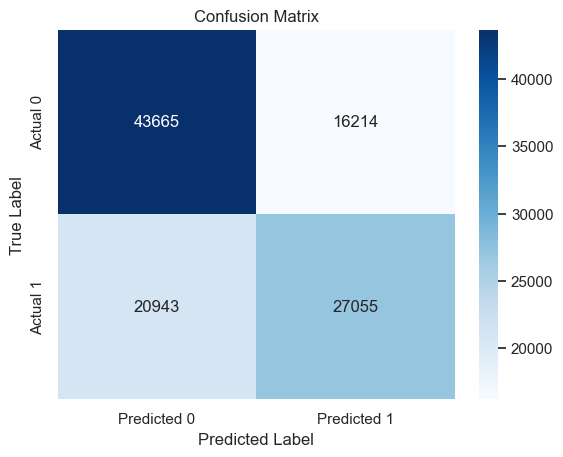

In [66]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Insights

From the confusion matrix of the random forest model
- True Positive - The number of non delayed airline accurately predicted is 43665 which is approx. 40.5%
- True Negative - The number of delayed airline accurately predicted is 27055 which is approx. 25.1%
- False Positive - The number of non delayed airlines, that was predicted as delayed is 16214 which is approx. 15%
- False Negative - The number of delayed airlines, that was predicted as non delayed is 20943 which is approx. 19.4%

Based on the above predictions, it can be deduced that;
- IThe model accuracy is good and balanced but not exceptional
- The precision(~73%) is higher than recall, it means when the model predicts positive, it is always correct, except in few cases(FN - 20,943).
- Specificity is relatively low (FP = 16,214)

In [67]:
# For XGboost model
dm = confusion_matrix(y_test, y_pred)

dm

array([[47547, 12332],
       [23038, 24960]])

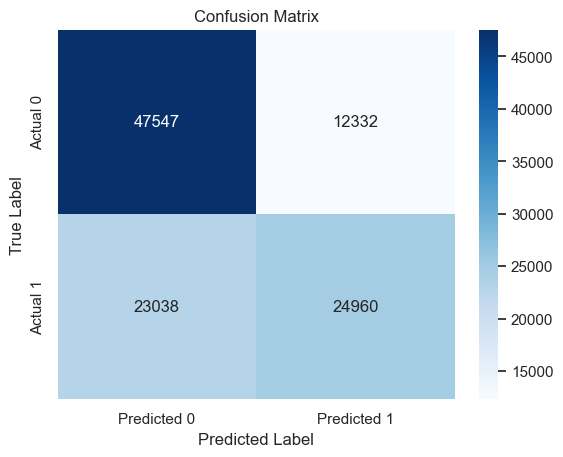

In [68]:
sns.heatmap(dm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Insights

From the confusion matrix of the XG Boost model
- True Positive - The number of non delayed airline accurately predicted is 47547 which is approx. 44.1%
- True Negative - The number of delayed airline accurately predicted is 27055 which is approx. 23.1%
- False Positive - The number of non delayed airlines, that was predicted as delayed is approx. 11%
- False Negative - The number of delayed airlines, that was predicted as non delayed is approx. 21.4%

Based on the above predictions, we can deduced that;
- Compared to the random forest matrix, precision improved (~79.4%), which means the model is more accurate when predicting a positive. 
- Recall is slightly lower because of the false negative(23,038) 
- There is moderate total accuracy of ~67.8%
- The model is missing more actual positives (FN) than wrongly prediciting positives (FP).

##### Determining the AUC SCORE

In [69]:

xgboost_prob = xgb_search.predict_proba(x_test)[:, 1] #Probability for positive class


auc_score = roc_auc_score(y_test, xgboost_prob)


print("AUC score:", auc_score)


AUC score: 0.7282208383334019


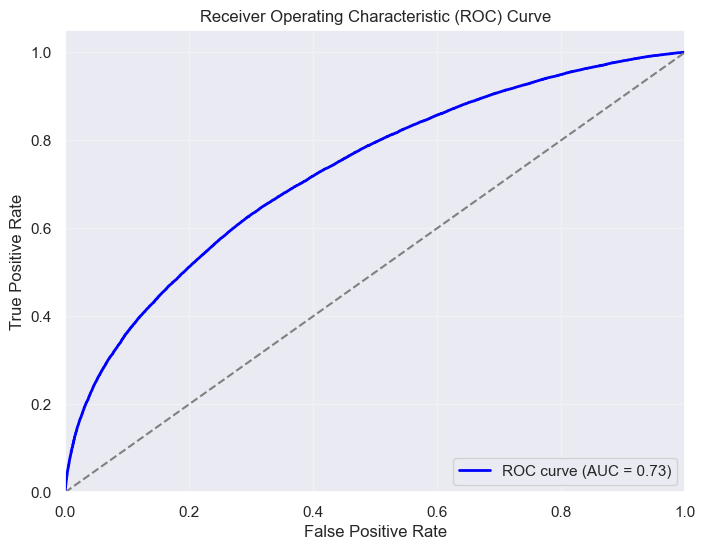

In [71]:
fpr, tpr, _ = roc_curve(y_test, xgboost_prob)

# Visualizing ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig("ROC CURVE.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import joblib
# Save the trained Random Forest model
joblib.dump(forest_random_search, "Airline_delay_precision_model1.pkl")

In [72]:
import joblib
# Save the trained XGboost model
joblib.dump(xgb_search, "Airline_delay_precision_model2.pkl")

['Airline_delay_precision_model2.pkl']